
# Application of PCA Dimensionality Reduction: Education and Air Pollution

## Objective
In this case study, we will use the Education and Air Pollution dataset
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE


## Mount Google Drive for Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [15]:
data = pd.read_csv("/content/drive/MyDrive/ColabCodeRepo/DataFiles/Education_Post_12th_Standard.csv")
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Explore Data Basic Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Data Preprocessing and Exploratory Data Analysis
### Find which columns are unique and drop as thay may not add enough value to our analysis

In [6]:
unique_columns = [col for col in data.columns if data[col].nunique() == len(data) ]
unique_columns

['Names']

## What are the Summary Stats

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


## Observation:
### PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's check how many such observations are there in the data.

## Find the data where PHD or Grade is more than 100%

In [8]:
data[ (data.PhD > 100) | (data.Grad_Rate > 100) ]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,Texas A&M University at Galveston,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [9]:
# Replace values greater than 100 with median value
for col in ['PhD', 'Grad_Rate']:
    median_val = data[data[col] <= 100][col].median()
    data.loc[data[col] > 100, col] = median_val

data[ (data.PhD > 100) | (data.Grad_Rate > 100) ]


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate


## Lets review the Distribution and outlier for each column

Distribution and outliers for Apps:


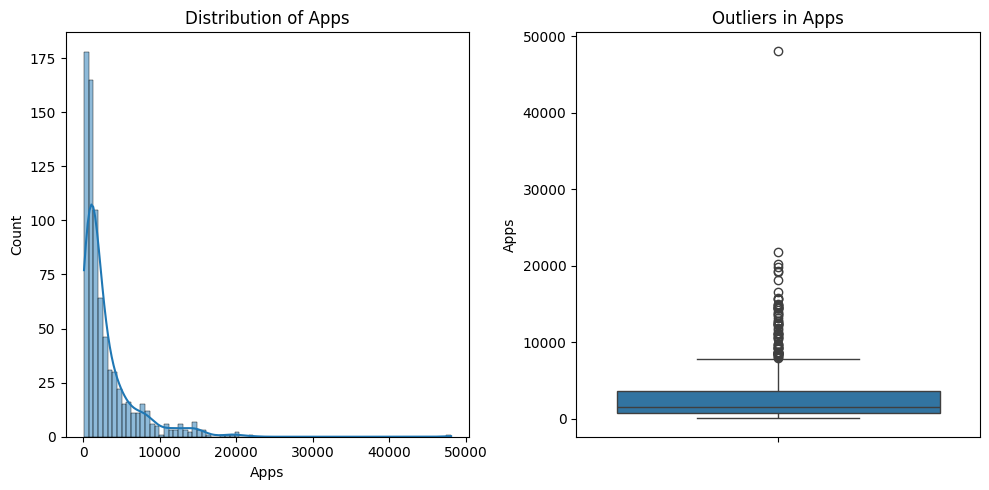



Distribution and outliers for Accept:


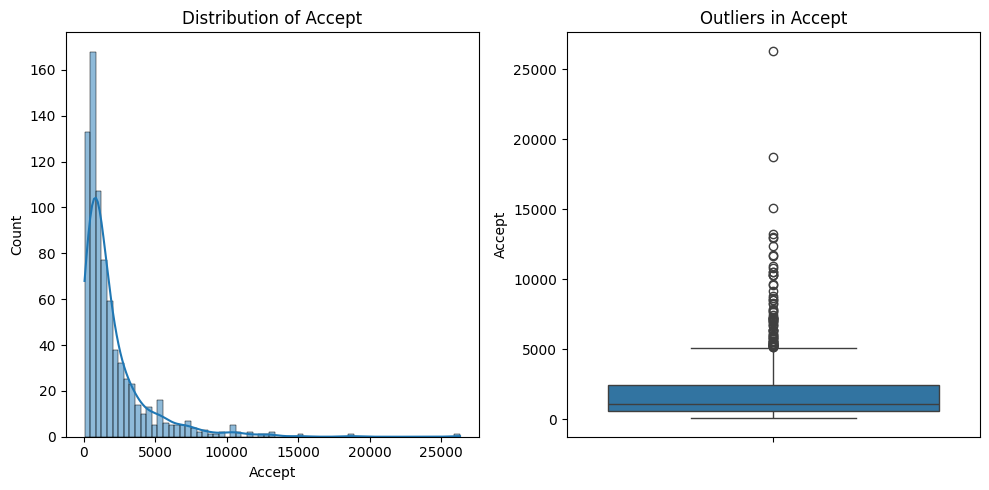



Distribution and outliers for Enroll:


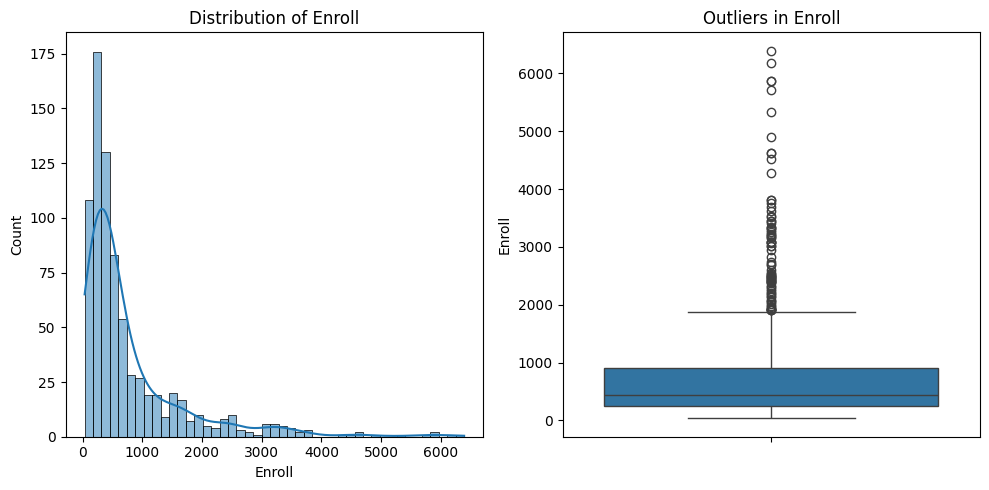



Distribution and outliers for Top10perc:


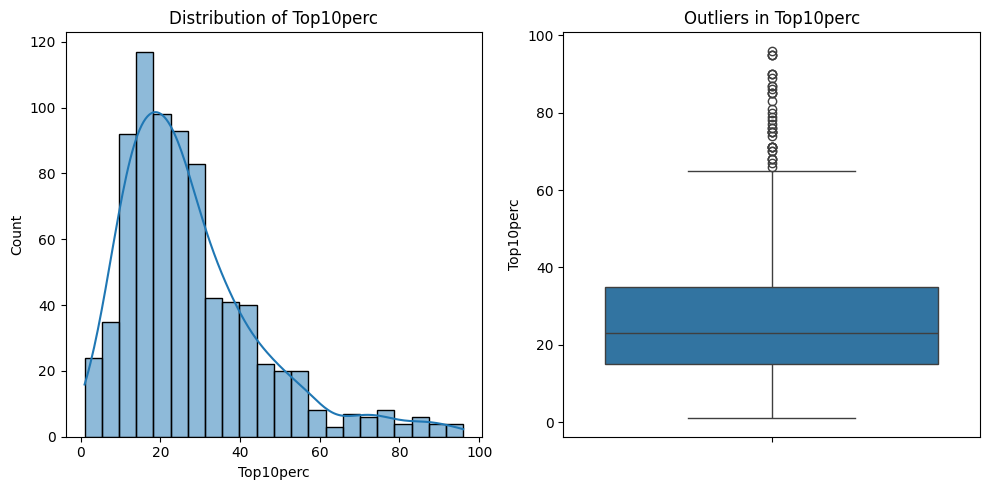



Distribution and outliers for Top25perc:


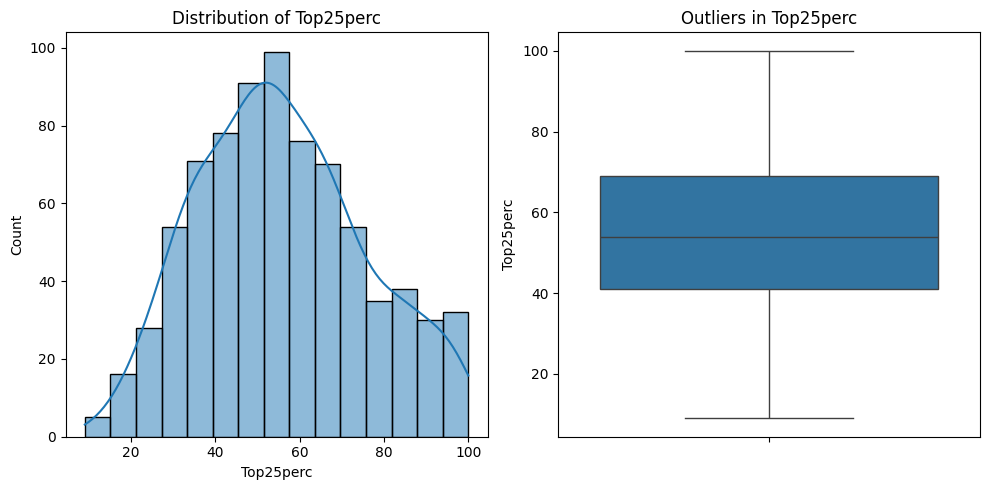



Distribution and outliers for F_Undergrad:


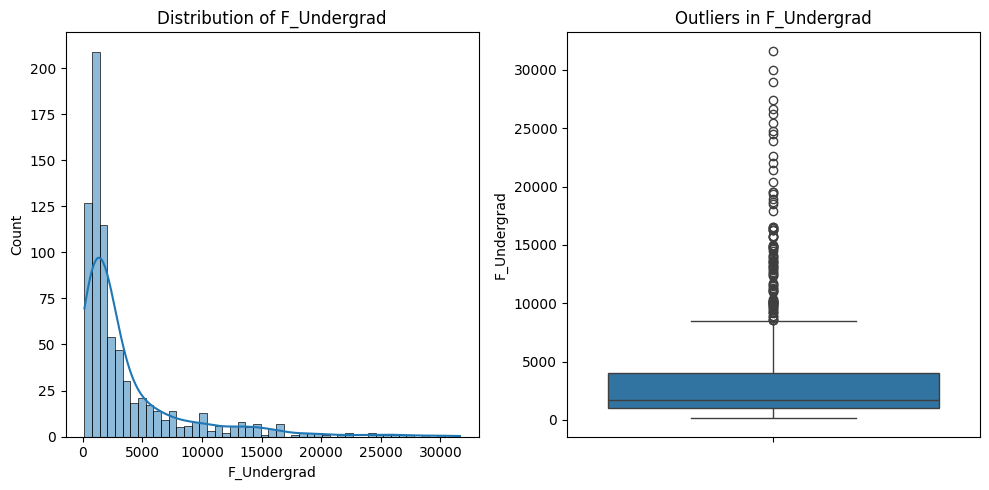



Distribution and outliers for P_Undergrad:


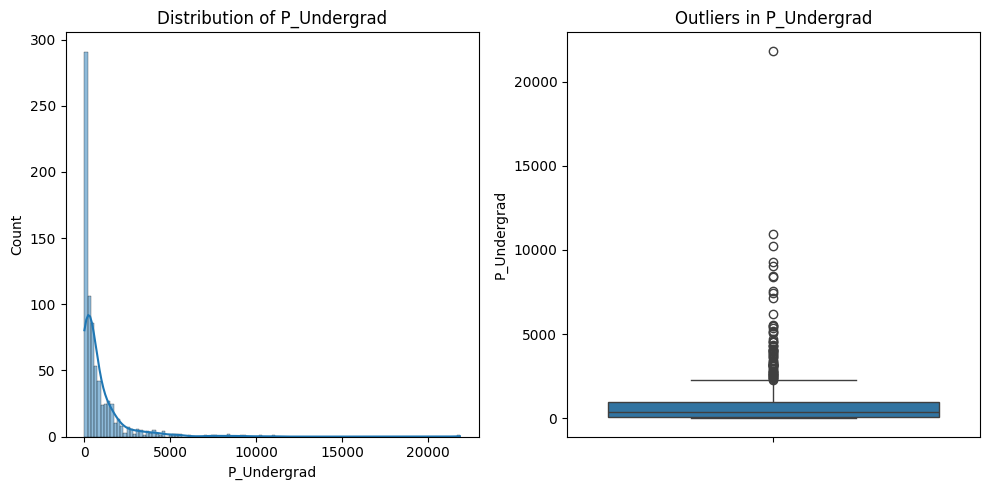



Distribution and outliers for Outstate:


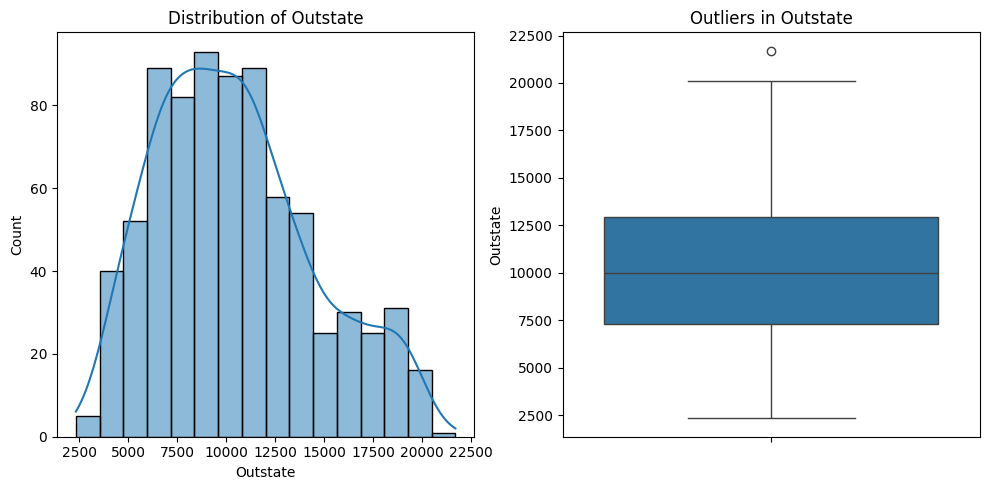



Distribution and outliers for Room_Board:


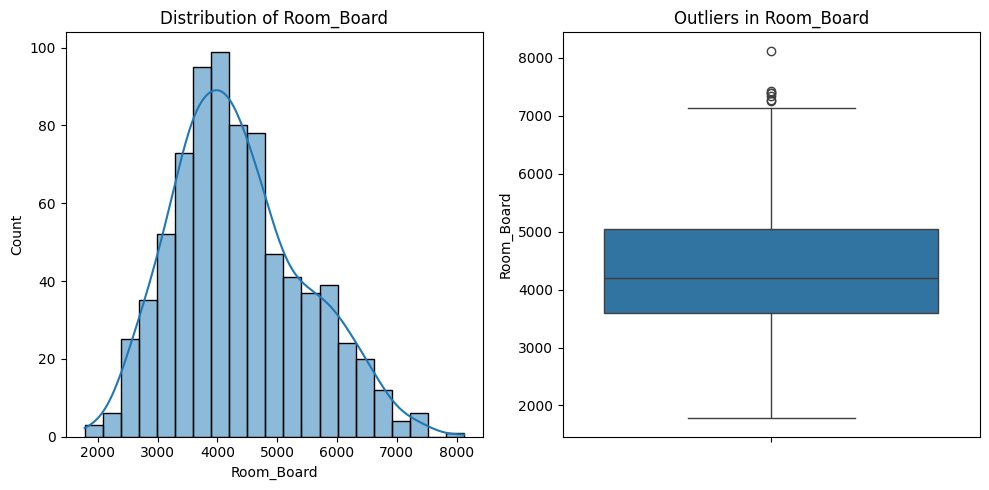



Distribution and outliers for Books:


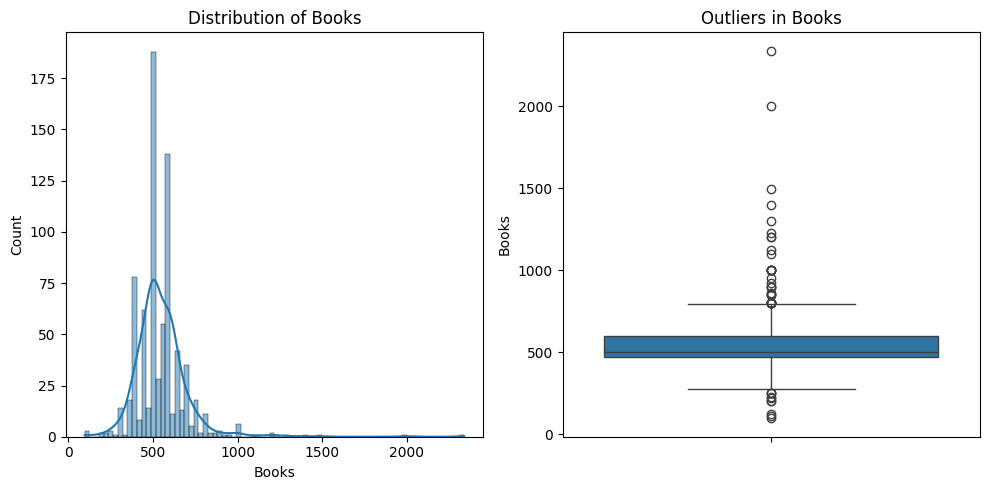



Distribution and outliers for Personal:


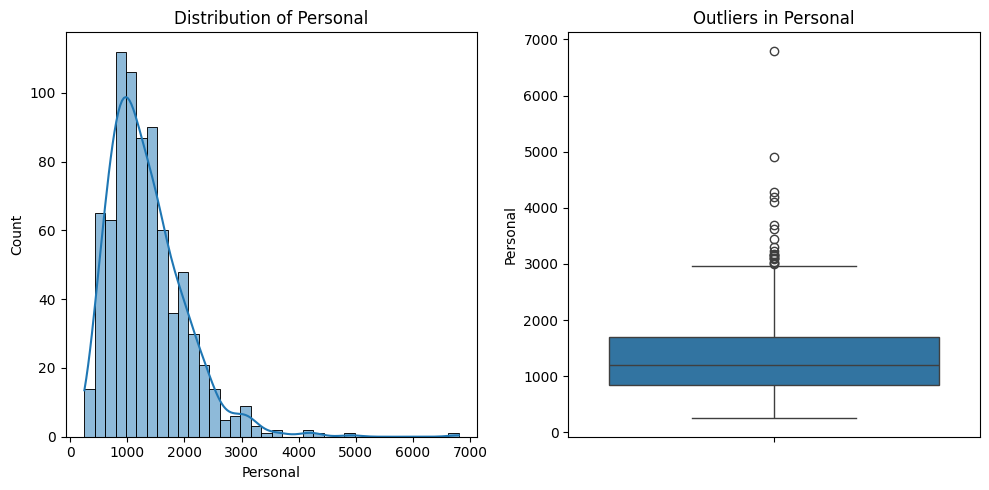



Distribution and outliers for PhD:


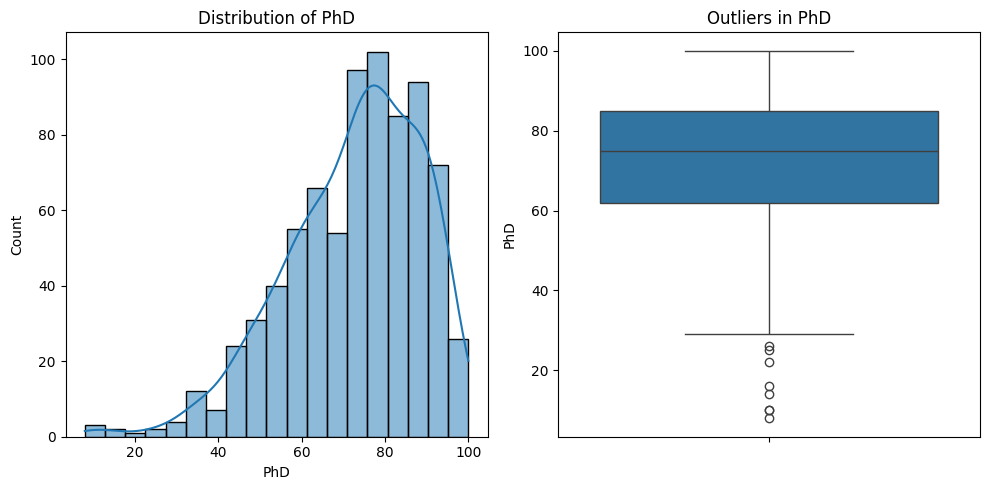



Distribution and outliers for Terminal:


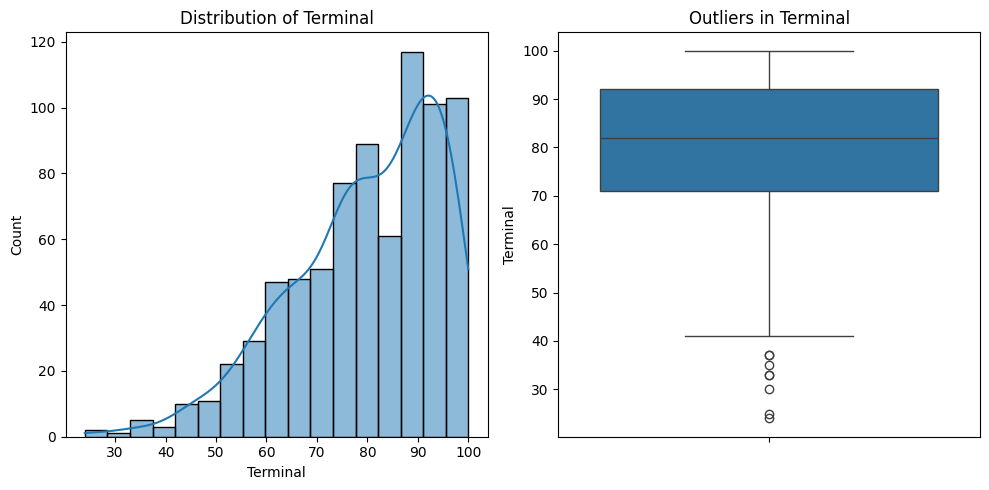



Distribution and outliers for S_F_Ratio:


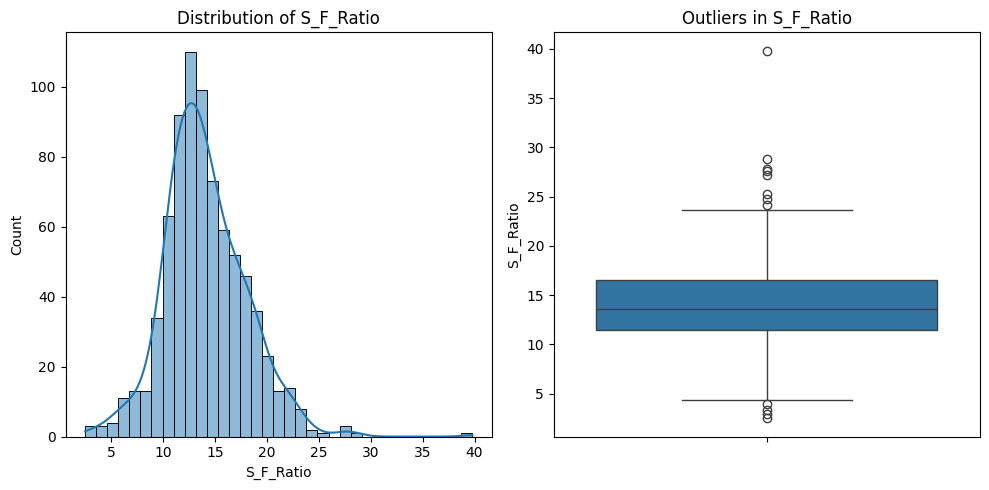



Distribution and outliers for perc_alumni:


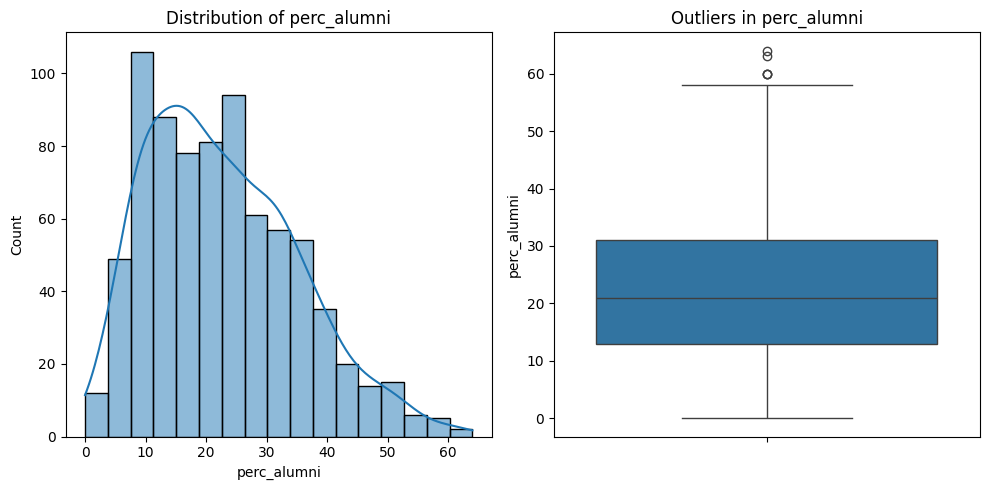



Distribution and outliers for Expend:


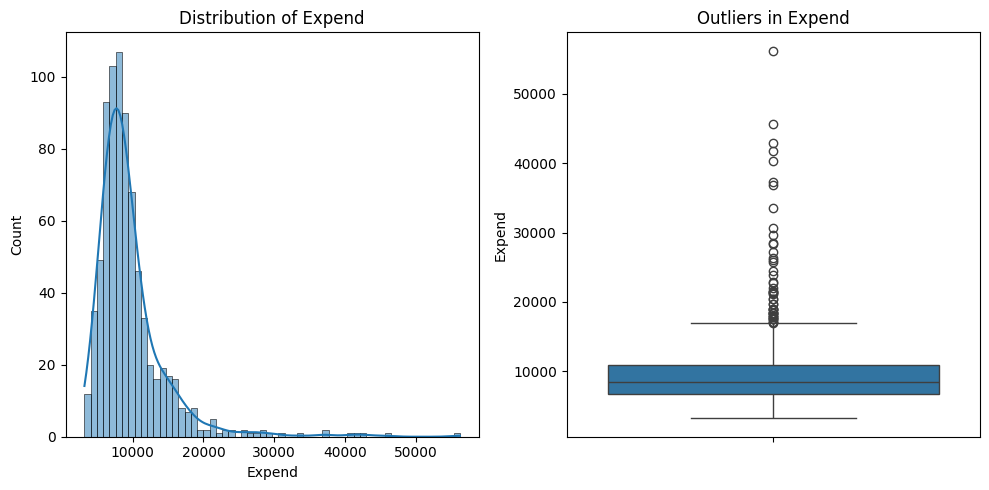



Distribution and outliers for Grad_Rate:


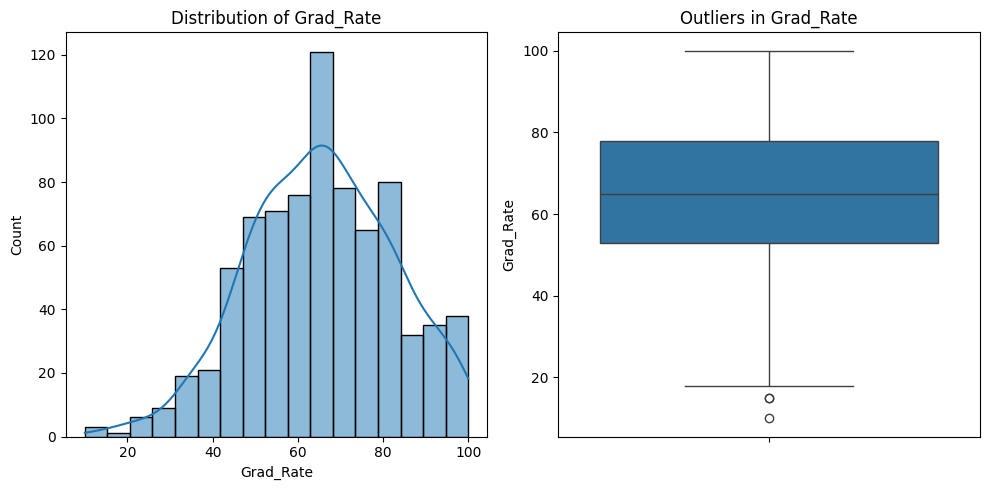

In [10]:
# prompt: Let's check the distribution and outliers for each column in the data.

import matplotlib.pyplot as plt
# Check distribution and outliers
for col in data.columns[1:]:
    print(f"Distribution and outliers for {col}:")
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f"Outliers in {col}")

    plt.tight_layout()
    plt.show()
    print("\n")


## Now, let's check the correlation among different variables.

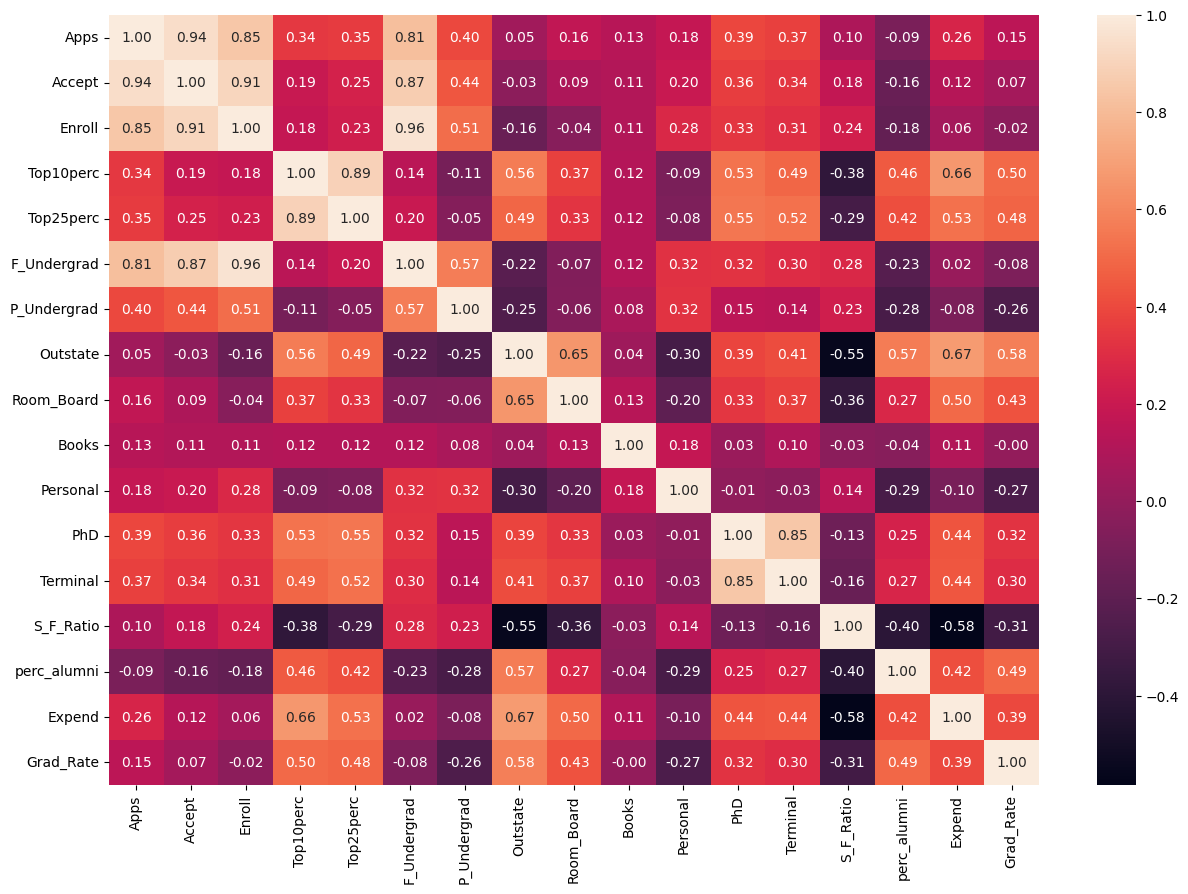

In [11]:
plt.figure(figsize = (15, 10))

# Calculate correlation excluding non-numeric columns
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot = True, fmt = '0.2f')

plt.show()

O## bservations:

### We can see a high positive correlation among the following variables:
* Apps and Accept
* Apps and Enroll
* Apps and F_Undergrad
* Accept and Enroll
* Accept and F_Undergrad
* Enroll and F_Undergrad
* Top10perc and Top25percent
* PhD and Terminal
###  We can see a high negative correlation among the following variables:
* S_F_Ratio and Top10perc
* S_F_Ratio and Outstate

## Scaling the data


In [16]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Select only numerical columns before scaling
numerical_data = data.select_dtypes(include=['number'])

scaler = StandardScaler()
data_scaled_numeric = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
data_scaled_numeric.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


## Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique often used to reduce the number of features in a dataset while retaining the most important information. When you fit a PCA model to your data using scikit-learn, one of the attributes you can access is pca.components_. Let's break down what pca.components_ represents:

### Understanding pca.components_

#### Principal Components:

PCA transforms your original features into a new set of features called principal components.
These principal components are linear combinations of the original features.
The principal components are ordered by the amount of variance they capture from the data. The first principal component captures the most variance, the second captures the second most, and so on.

#### pca.components_:

* This attribute is a 2D numpy array where each row represents a principal component.
* The number of rows is equal to the number of principal components you specified when fitting the PCA model (or the number of original features if you didn't specify a number).
* The number of columns is equal to the number of original features.
* Each element in this array represents the weight (or loading) of an original feature in the corresponding principal component.

##### Interpreting pca.components_

* Rows: Each row corresponds to a principal component.
* Columns: Each column corresponds to an original feature.
* Values: The value in the i-th row and j-th column represents the contribution (or weight) of the j-th original feature to the i-th principal component.

#### Assume if Principal components array for a specific dataset is following:[[-0.658, -0.729, -0.189],[ 0.752, -0.606, -0.259]]


* First Principal Component: [-0.658, -0.729, -0.189]
This means the first principal component is a linear combination of the original features with these weights. It can be interpreted as: PC1=−0.658⋅Feature1−0.729⋅Feature2−0.189⋅Feature3

* Second Principal Component:[0.752, -0.606, -0.259]This means the second principal component is another linear combination of the original features with these weights.
It can be interpreted as: PC2=0.752⋅Feature1−0.606⋅Feature2−0.259⋅Feature3

###  Summary
* pca.components_ gives you the directions (or axes) of the new feature space defined by the principal components.
* Each principal component is a combination of the original features, with the coefficients indicating the importance and contribution of each feature to that component.
* Understanding these components helps in interpreting the transformed data and understanding how the original features contribute to the principal components.

In [23]:
# Defining the number of principal components to generate
n = data_scaled_numeric.shape[1]
n

# Finding principal components for the data
# pca = PCA(n_components = n, random_state = 1)

# data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled_numeric))

# The percentage of variance explained by each principal component
# exp_var = pca.explained_variance_ratio_
# exp_var


17

## Cumulative Variance
To understand the cumulative variance explained by the principal components, you can use the explained_variance_ratio_ attribute of the PCA object in scikit-learn. This attribute gives you the proportion of variance explained by each principal component. By calculating the cumulative sum of these values, you can determine how much of the total variance is explained as you include more principal components.

### Here’s how we can do this:

Fit the PCA model to your data.
Access the explained variance ratio.
Calculate the cumulative variance.

### Explained Variance Ratio:

* pca.explained_variance_ratio_ gives the variance explained by each principal component.

 * For example, if explained_variance_ratio_ is [0.5, 0.3, 0.2], it means the first principal component explains 50% of the variance, the second explains 30%, and the third explains 20%.

* Cumulative Variance:

  * np.cumsum(explained_variance_ratio) calculates the cumulative variance explained by the principal components.
  * Continuing the example, the cumulative variance would be [0.5, 0.8, 1.0], meaning the first two principal components together explain 80% of the variance, and all three explain 100%.

* DataFrame Visualization:

  Creating a DataFrame helps visualize the explained variance and cumulative variance for each principal component.
  This analysis helps determine the number of principal components required to explain a sufficient amount of the total variance in the data, aiding in dimensionality reduction while retaining essential information.

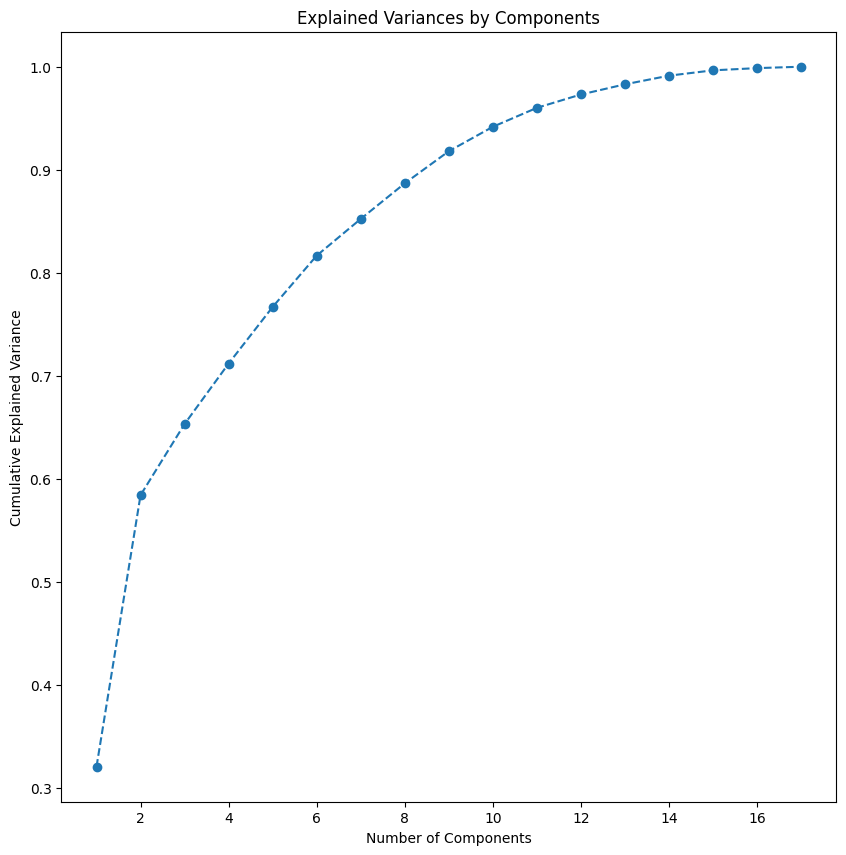

In [14]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [15]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 4


## Observations:

We can see that out of the original 17 features, we have reduced the number of features through PCA to 4 principal components. The first four principal components explain approximately 70% of the original variance.

So that is about a 76% reduction in the dimensionality of the dataset with only a loss of 30% in variance

In [16]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), index = pc_comps, columns = data_scaled_numeric.columns)

data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.29
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.06
Top25perc,0.34,-0.04,-0.03,-0.12
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.14
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.07


## Observations:

Each principal component is a linear combination of the original features.
For example, we can write the equation for PC1 in the following manner:
PC1 = 0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F_Undergrad + 0.03 * P_Undergrad + 0.29 * Outstate + 0.25 * Room_Board + 0.06 * Books - 0.04 * Personal + 0.32 * PhD + 0.32 * Terminal - 0.18 * S_F_Ratio + 0.21 * perc_alumni + 0.32 * Expend + 0.25 * Grad_Rate
The first two principal components pick up around 58% of the variability in the data, which is a considerable amount.

The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features. This is relevant in a business context, in deciding which features in the dataset are important for the problem and which ones are not. Normally, a threshold is used as a cut-off to determine if a feature is important or not. For example, we can consider only those weights with an absolute value greater than 0.4 as significant.

In [20]:
def color_high(val):

    if val < -0.20:                     # You can decide any value as per your understanding
        return 'background: pink'

    elif val >= 0.35:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

<ipython-input-20-843fbeb44be6>:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.290000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.060000
Top25perc,0.340000,-0.040000,-0.030000,-0.120000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.140000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.070000


Observations:

The first principal component, PC1, seems to be related to high values of student scores (Top10perc, Top25perc), number of out-of-state students (Outstate), the faculty education level (PhD and Terminal), and the instructional expenditure (Expend) per student. The first principal component seems to capture attributes that generally define premier colleges with a high quality of students entering them, and more accomplished faculty teaching there. The students entering these colleges also appear to be relatively financially well-off.
The second principal component, PC2, seems to be related to high values of number of applications received (Apps), accepted (Accept), and enrolled (Enroll), and the number of full time (F_Undergrad) and part time (P_Undergrad) students. The second principal component seems to capture attributes that generally define non-premier colleges that are comparatively easier to get admissions into.
The third principal component, PC3, seems to be related to financial aspects, i.e., personal spending (Personal) and cost of books (Books) for a student. It is also associated with low values of student faculty ratio (S_F_Ratio).
The fourth principal component, PC4, seems to be related to lower values of faculty education level and high values of students' graduation rate. The fourth principal component seems to capture attributes that define colleges which lack highly educated faculty (PhD and Terminal) and are comparatively easier to graduate from (Grad_Rate).
We can also visualize the data in 2 dimensions, using the first two principal components.

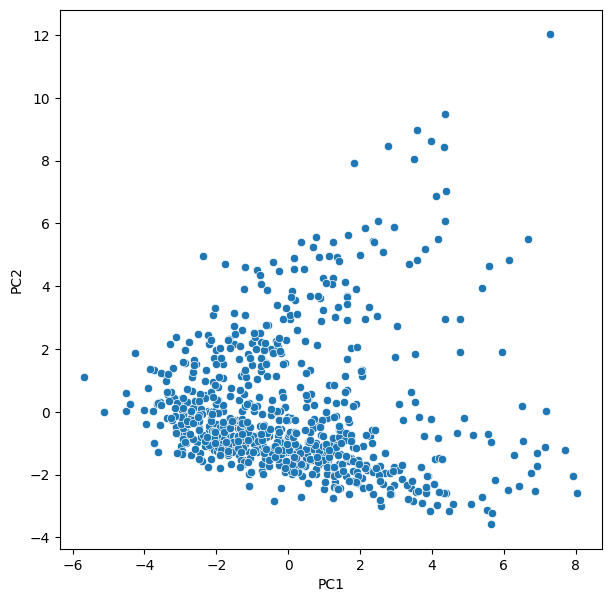

In [21]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

## t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful technique for visualizing high-dimensional data by reducing it to two or three dimensions. Unlike PCA, which is a linear dimensionality reduction method, t-SNE is nonlinear and focuses on preserving the local structure of the data. It is particularly useful for visualizing clusters or groupings in the data.

### How you can use t-SNE in Python with scikit-learn:

* Install scikit-learn and any other required libraries.
* Prepare your data.
* Apply t-SNE.
* Visualize the results.

#### Load Data:

* In this example, we use the Iris dataset, a commonly used dataset in machine learning.
* Data contains the features, and labels contain the class labels.

#### Apply t-SNE:

* We create a t-SNE object with the desired parameters:
  * n_components=2: Reduce the data to 2 dimensions for easy visualization.
  * perplexity=30: A parameter related to the number of nearest neighbors. Typical values are between 5 and 50.
  * n_iter=300: The number of iterations for optimization. Higher values can lead to better results but take more time.
  * fit_transform(data) applies t-SNE to the data.

* Create DataFrame:
  We create a DataFrame with the t-SNE results for easy handling and plotting.

* Plot the Results:

  We use matplotlib to create a scatter plot of the t-SNE results.
  Points are colored based on their labels to visualize the clustering of different classes.

#### t-SNE Parameters:

* perplexity: Balances attention between local and global aspects of the data. Common values are between 5 and 50.
* n_iter: Number of iterations for optimization. A higher number can produce better embeddings but requires more time.
Performance:

* t-SNE can be computationally intensive, especially for large datasets. Consider using a smaller dataset or reducing dimensions with PCA before applying t-SNE.

#### Interpretation:
t-SNE is primarily for visualization and does not preserve global structure as well as PCA. It’s excellent for seeing clusters and local structures.
Feel free to adjust the parameters and dataset as needed for your specific use case.

### The perplexity parameter in t-SNE is a crucial hyperparameter that affects the balance between local and global aspects of the data when creating the embedding. It can be thought of as a smooth measure of the effective number of neighbors.

---


Guidelines for Choosing Perplexity Values
---

#### Range of Values:

* Common values for perplexity range between 5 and 50.
* Lower perplexity values (e.g., 5-10) focus more on local structure and can highlight very fine-grained patterns.
* Higher perplexity values (e.g., 30-50) focus more on global structure and can reveal broader clusters.

#### Dataset Size:

* For small datasets, a lower perplexity value might work well.
* For larger datasets, a higher perplexity value is often more appropriate.
* A rule of thumb is to set the perplexity to be roughly equal to the number of closest neighbors that each point should consider. For very large datasets, this might be in the hundreds.

#### Empirical Testing:

It’s often useful to experiment with different perplexity values and visualize the results to see what works best for your specific dataset.
There’s no one-size-fits-all value, and the best perplexity might vary depending on the nature and structure of your data.

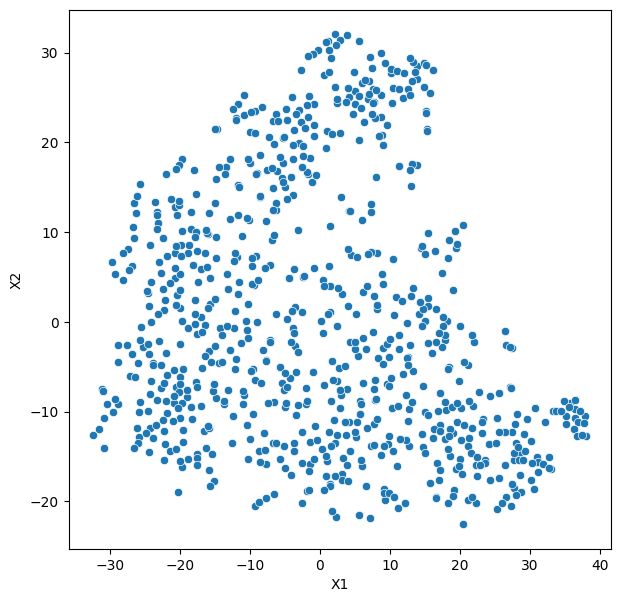

In [25]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled_numeric)
# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])
# Scatter plot for two components
plt.figure(figsize = (7,7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

### Observations:

We know that t-SNE preserves the local structure of the data while embedding the data from high dimensions to low dimensions.
Here, we have generated the 2D and 3D embeddings for the data. We can see that there is no pattern in the data - it is scattered and clustered together with the exception of some outliers.
Let's try different perplexity values to visualize the data in 2D.

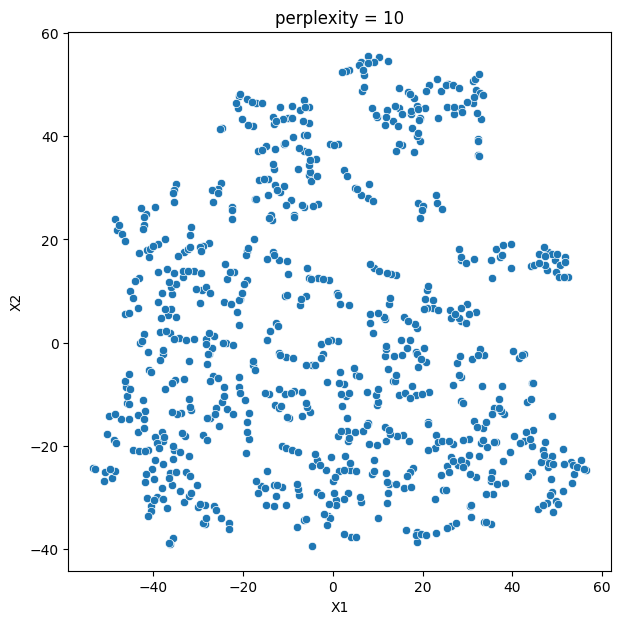

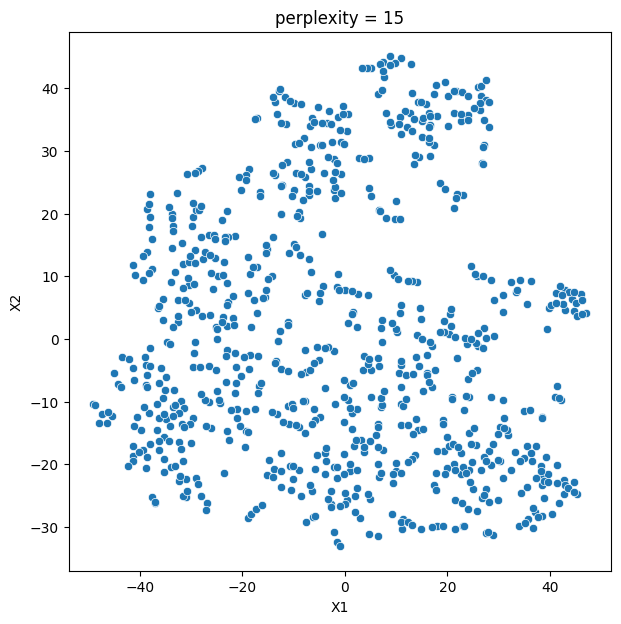

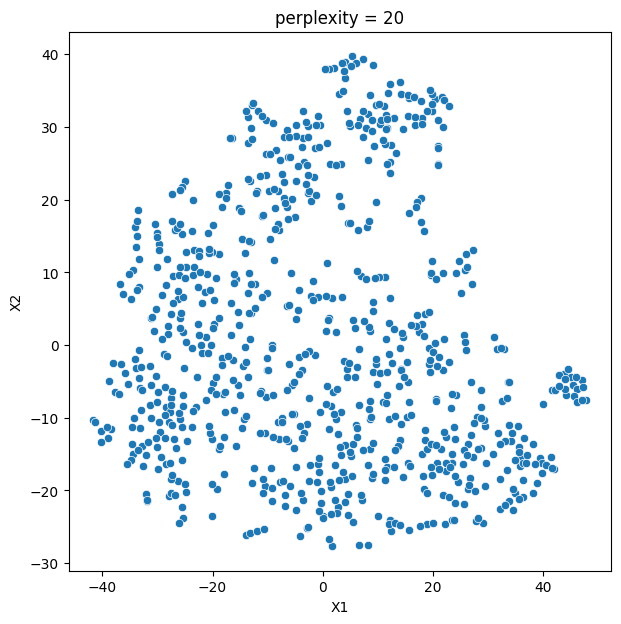

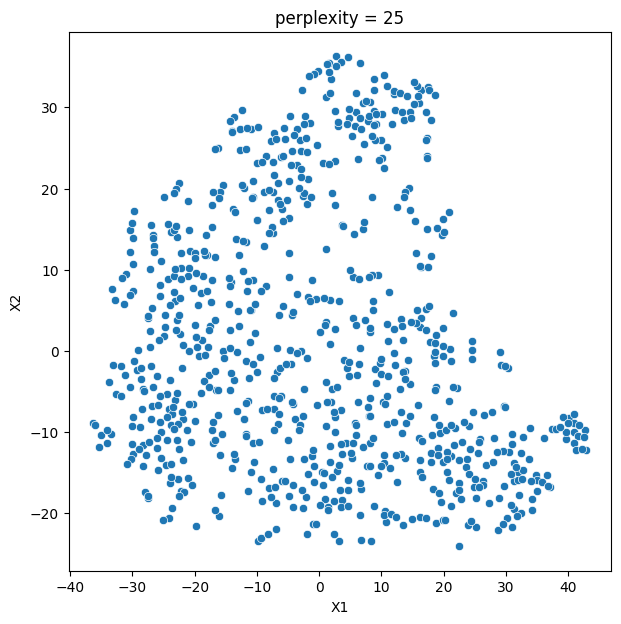

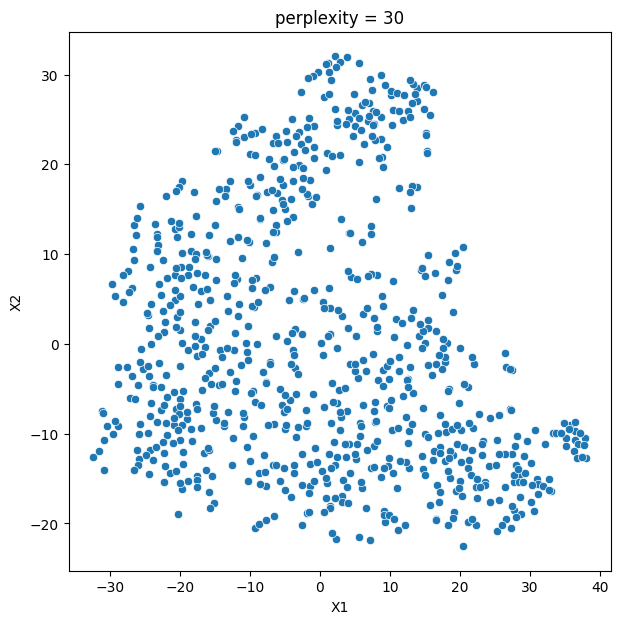

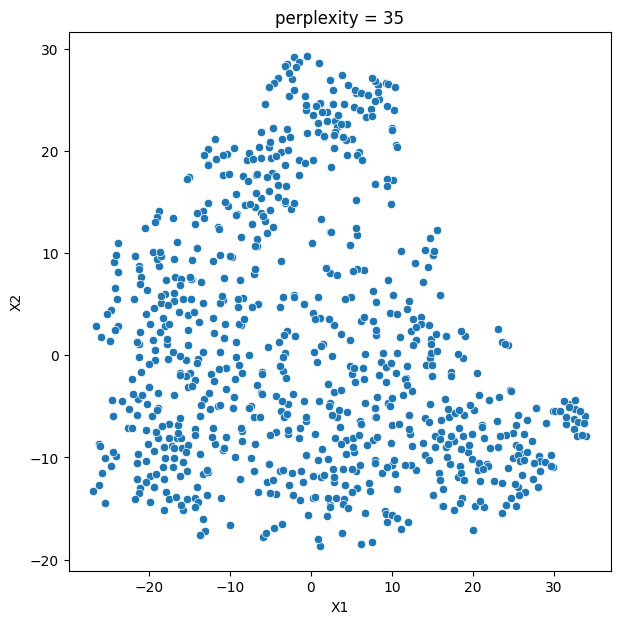

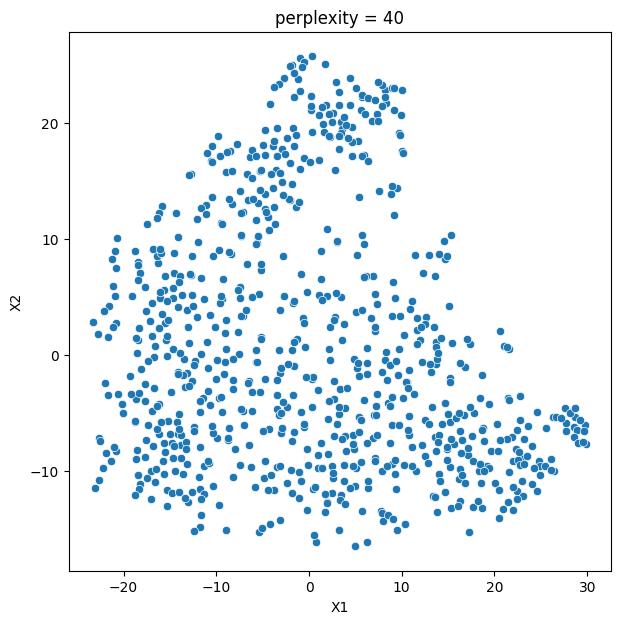

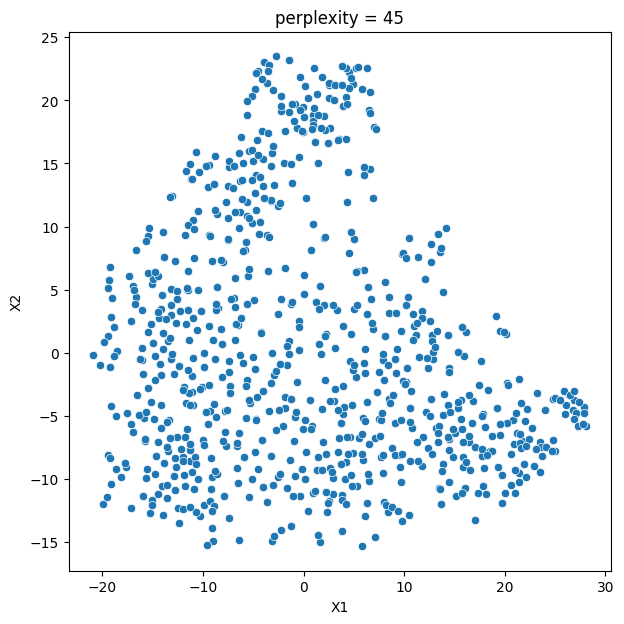

In [27]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_tsne = tsne.fit_transform(data_scaled_numeric)

    data_tsne = pd.DataFrame(data_tsne)

    data_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7, 7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

    plt.title("perplexity = {}".format(i))

### Observations:

* All the plots with different perplexity values imply that there is no underlying pattern in the data.
* This shows that observing patterns in data projection and visualization techniques like PCA and t-SNE, is actually dependent on the nature of the data.
* Let's look at the implementation of PCA and t-SNE on another dataset.

## Air Pollution Data
* In this segment of the case study, let us apply the same techniques to another dataset relating to air pollution.
* This dataset contains about 13 months of data on major pollutants and meteorological levels of a city.
* Let's get an overview of the data and prepare it for visualization.

In [3]:
# Loading the data
data_air_pol = pd.read_csv("/content/drive/MyDrive/ColabCodeRepo/DataFiles/AirPollutionCaseStudyDataset.csv")
data_air_pol.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


In [4]:
data_air_pol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

* There are 403 observations and 27 columns in the data.
* All the columns except Date and Weather are of numeric data type.
* The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
* Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
* The majority of the columns have some missing values.
* Let's check the number of missing values in each column.

In [5]:
data_air_pol.isnull().sum()


,0
SrNo,0
Date,0
NO,2
CO,1
NO2,2
O3,6
SO2,4
PM2.5,2
Benzene,1
Toulene,1


* All the columns except SrNo and Date have missing values.
* We will impute (fill in) these missing values by using the mode for the categorical variables and the median for the numerical ones

In [6]:
# Dropping the columns - SrNo and Date
data_air_pol.drop(columns = ["SrNo", "Date"], inplace = True)

In [7]:
# Imputing missing values with mode for the Weather column and with median for all other columns
for col in data_air_pol.columns:

    if col == "Weather":
        data_air_pol[col].fillna(value = data_air_pol[col].mode()[0], inplace = True)

    elif data_air_pol[col].dtype in ['int64', 'float64']: # Check if column is numeric
        data_air_pol[col].fillna(value = data_air_pol[col].median(), inplace = True)

    else:
        print(f"Skipping non-numeric column: {col}") # Inform user about skipped columns

data_air_pol.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,1.22,0.08,162.18,732.25,Summer,108.24,250.105,73.52,21.605,1.775
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.850,47.94,16.880,1.770
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,1.55,-0.17,146.94,728.08,Summer,108.24,250.105,73.52,21.605,1.775
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.360,59.86,13.110,0.500
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,0.88,0.15,137.01,730.62,Summer,112.95,232.220,63.56,16.190,0.770


In [8]:
# Creating dummy variables for Weather column
data_air_pol = pd.get_dummies(data_air_pol, drop_first = True)

In [9]:
data_air_pol.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,False,False,True,False
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,False,False,True,False
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,False,False,True,False
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,False,False,True,False
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,False,False,True,False


In [33]:
# Scaling Data
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
data_air_pol_scaled = scaler.fit_transform(data_air_pol)
data_air_pol_scaled = pd.DataFrame(data_air_pol_scaled, columns = data_air_pol.columns)


data_air_pol_scaled

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.340235,-0.812975,-0.076848,1.060245,-0.280090,1.875727,-0.959988,-0.715510,-0.505771,-0.458029,...,0.777874,0.378372,1.296989,-0.218391,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
399,-0.690539,-0.875563,-1.100680,-0.323197,-0.072682,0.322992,-1.201595,-1.655384,-0.919061,-0.952957,...,0.526989,1.881486,2.480653,-0.072151,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
400,-0.820278,-0.988221,-1.620747,2.175289,-0.471972,-0.793375,-1.392867,-1.655384,-1.104116,-1.160172,...,0.705396,0.324962,1.266581,-1.103651,-0.068217,-0.872898,-0.426401,-0.410019,1.37061,-0.39755
401,-0.482359,-0.587658,-0.509201,-0.496467,-0.309151,-0.854521,-1.085825,-0.910996,-0.704706,-0.664178,...,1.106811,-0.794129,-0.364513,-1.627612,-0.469682,-0.986825,-0.426401,-0.410019,1.37061,-0.39755


In [34]:
# Principal Component Analysis

# Defining the number of principal components to generate
n = data_air_pol_scaled.shape[1]
n
# Finding principal components for the data
pca1 = PCA(n_components = min(data_air_pol_scaled.shape[1], data_air_pol_scaled.shape[0]), random_state = 1)
data_air_pol_pca = pd.DataFrame(pca1.fit_transform(data_air_pol_scaled))

# # The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_
exp_var1


array([0.40157886, 0.12764382, 0.07673692, 0.06749461, 0.04392657,
       0.03559814, 0.03115307, 0.02781003, 0.02365943, 0.02158212,
       0.01841877, 0.01622558, 0.01499302, 0.01363074, 0.01281323,
       0.0118397 , 0.01011448, 0.00961036, 0.00878955, 0.00583886,
       0.00510724, 0.00430188, 0.00307071, 0.0025847 , 0.00247086,
       0.00167626, 0.00082498, 0.00050549])

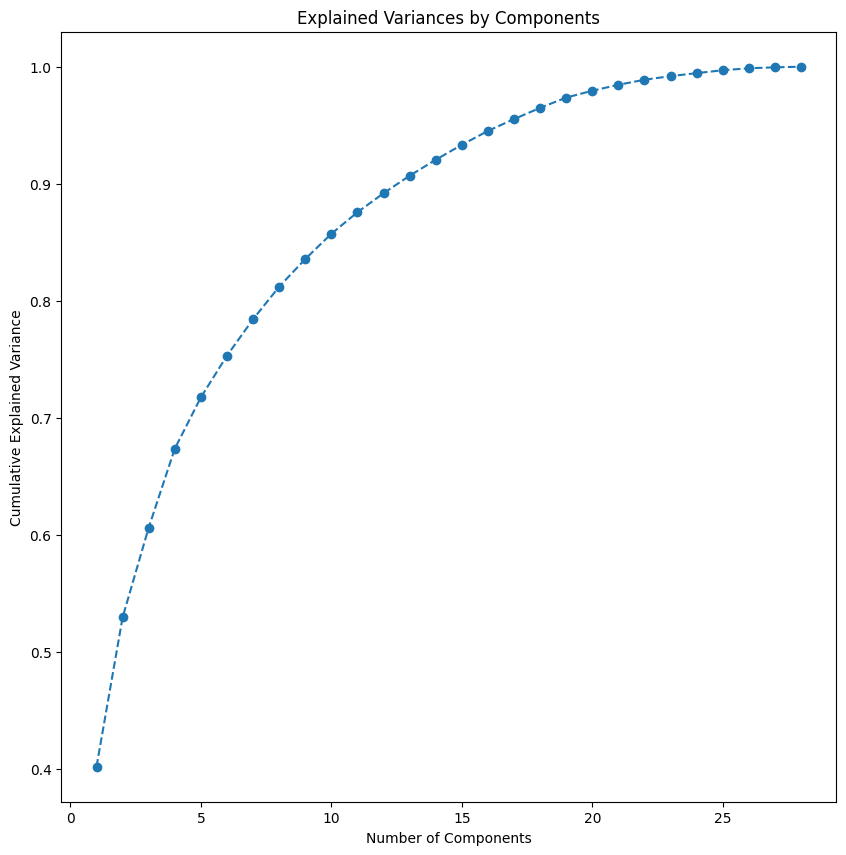

In [35]:
plt.figure(figsize = (10, 10))

# Adjust the x-axis range to match the number of components
plt.plot(range(1, pca1.n_components_ + 1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [36]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  5


In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2), index = pd.DataFrame(data_air_pol_scaled).columns, columns = cols)

In [38]:
def color_high(val):

    if val <= -0.25:                    # You can decide any value as per your understanding
        return 'background: pink'

    elif val >= 0.35:
        return 'background: skyblue'

pc1.style.applymap(color_high)

<ipython-input-38-bc1202e7cd30>:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pc1.style.applymap(color_high)


,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000


**Observations:**

- The first principal component, PC1, seems to be related to hydrocarbons like Benzene, Toluene, and Xylene that are generated due to fuel combustion.   
- The second principal component, PC2, seems to be related to humidity (RH), Ozone level, and rain, i.e., the rainy season. Whenever humidity goes down, the Ozone level goes up - more sunshine. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution.
- The third principal component, PC3, seems to be capturing air pressure - low pressure accompanies windy and rainy conditions, dispersing the pollution away. High pressure stills the wind allowing pollution to build up in urban areas.
- The fourth principal component, PC4, seems to be associated with high values of toxic gases like SO2 and is also related to the weather.
- The fifth principal component, PC5,  seems to be explaining the direction of the wind which impacts air pollution irrespective of the concentration of all pollutants. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction, for example, open farmland.

### **t-SNE**

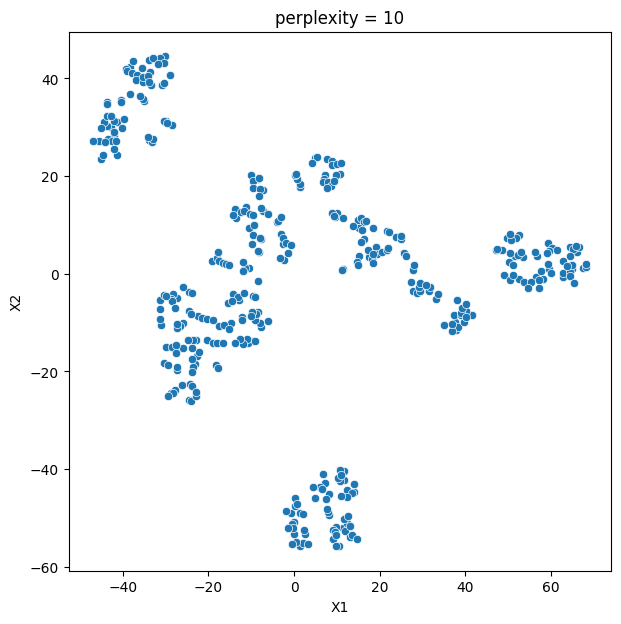

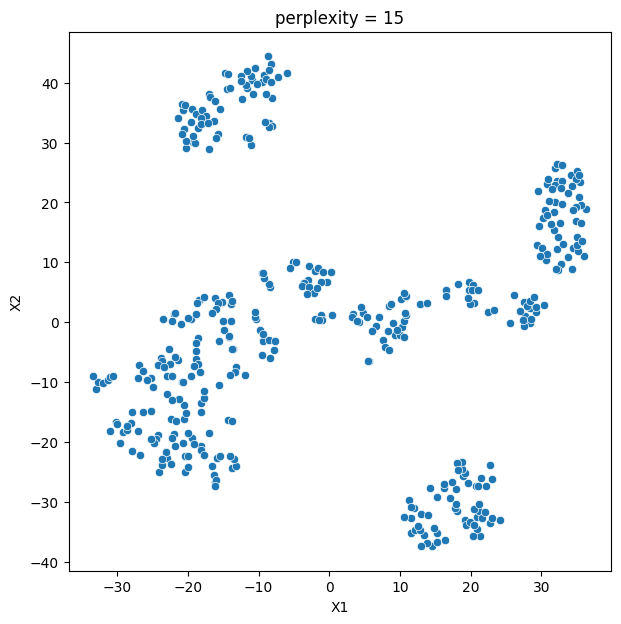

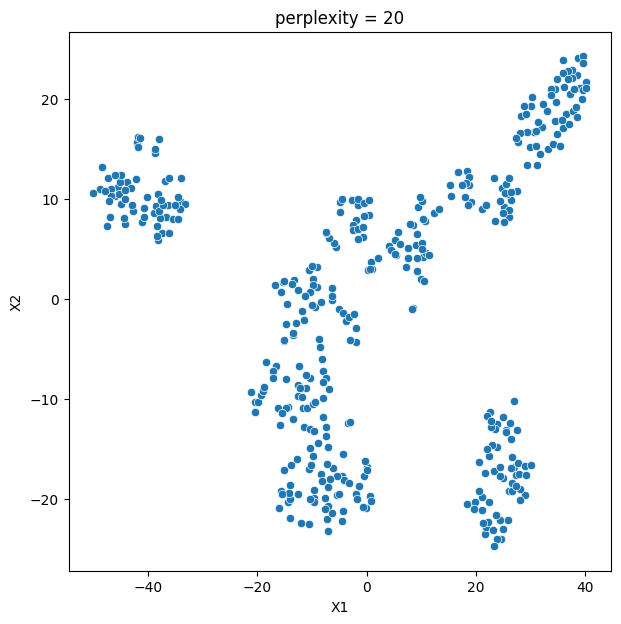

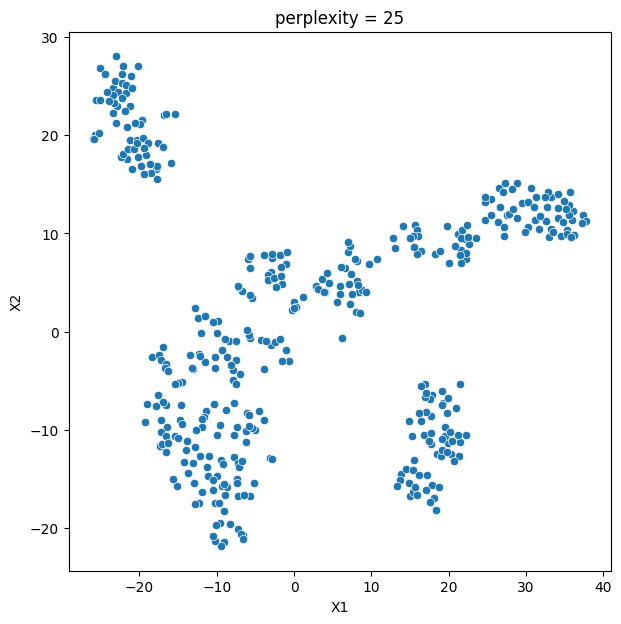

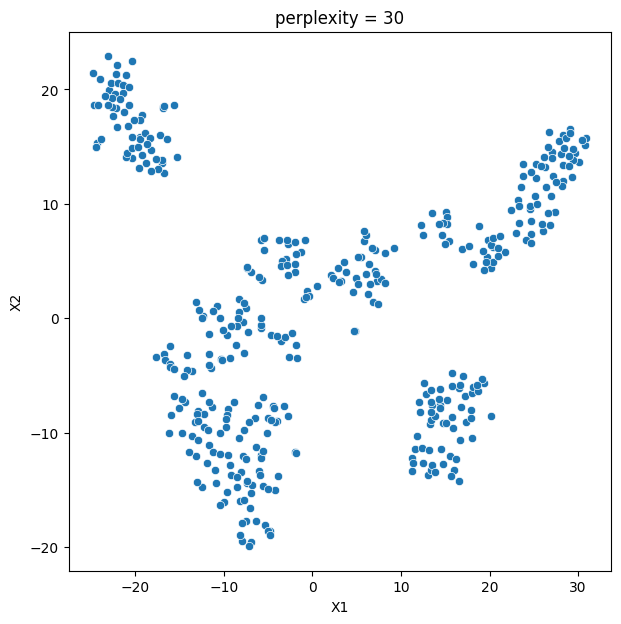

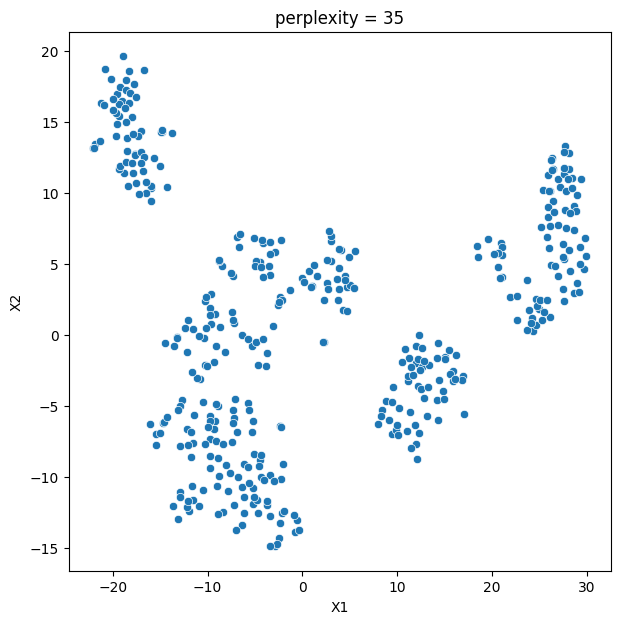

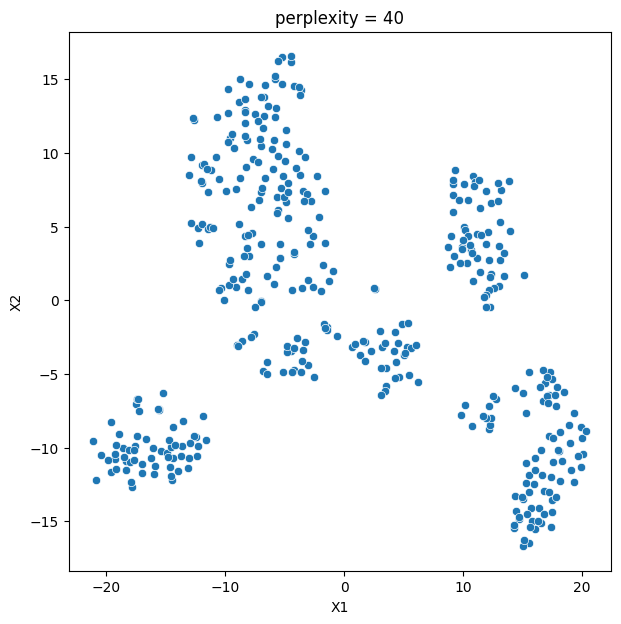

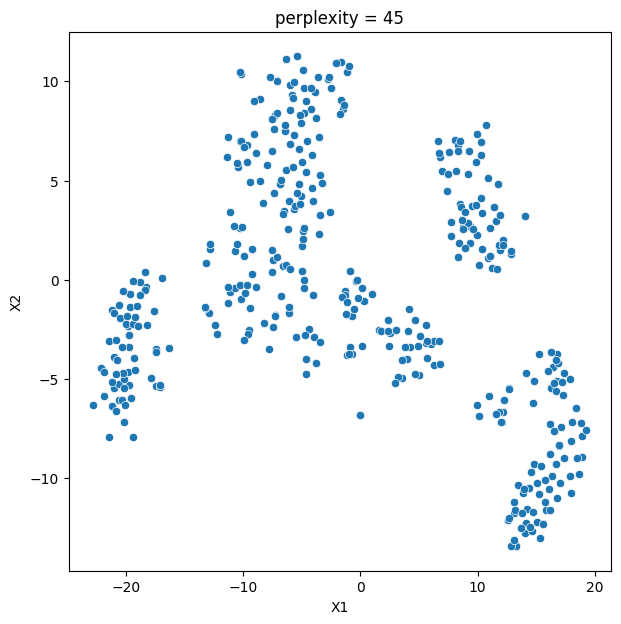

In [39]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)

    data_air_pol_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)

    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that some perplexity values like 35 and 45 are able to capture the underlying patterns in the data better than other values.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 45 as there are 4 clear groups which are distant from each other, i.e., well separated.**

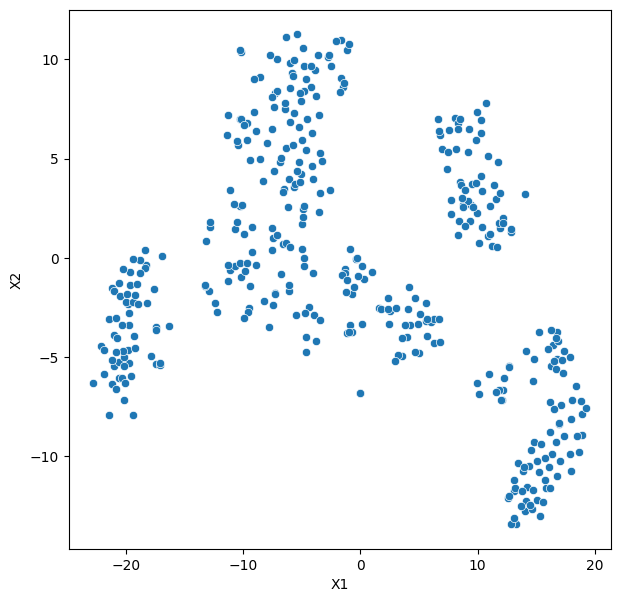

In [40]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 45)

data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)

# Converting the embeddings to a dataframe
data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne)

plt.show()

**Observations:**

- We can clearly see **4 groups in the data**.
- Let's **label these 4 groups** using the values of the X1 and X2 axes.

In [41]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']

    second_component = x['X2']

    if second_component < 1 and first_component <-12:
        return 'group_1'

    elif (second_component > -12) and (first_component >-13 and first_component < 7):
        return 'group_2'

    elif (second_component > 0) and (first_component > 0):
        return 'group_3'

    else:
        return 'group_4'

In [42]:
data_air_pol_tsne['groups'] = data_air_pol_tsne.apply(grouping, axis = 1)

<Axes: xlabel='X1', ylabel='X2'>

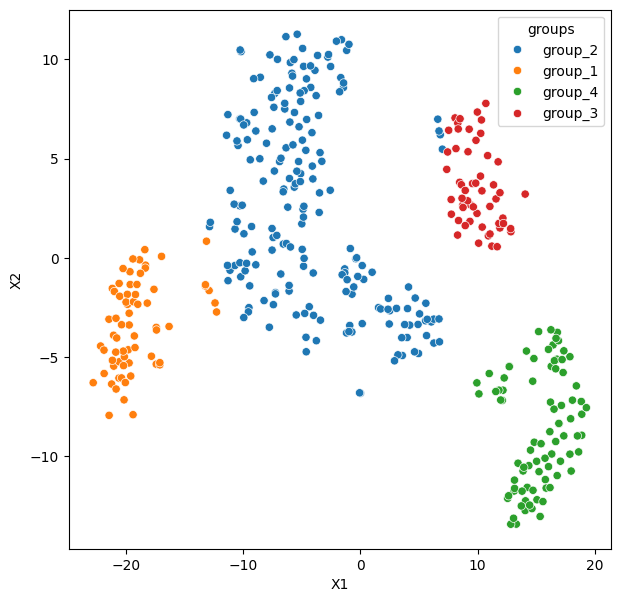

In [43]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))
1
sns.scatterplot(x = 'X1', y = 'X2', data = data_air_pol_tsne, hue = 'groups')

**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.**

           NO        CO       NO2        O3       SO2     PM2.5   Benzene  \
0   -0.762685 -0.274719 -1.028104 -0.176087 -0.360903 -0.966206 -1.005290   
1   -0.765059 -1.244831 -1.131729 -1.256817 -0.367671 -0.832590 -0.839185   
2   -0.758763 -1.069585 -0.565477  1.292291 -0.510985 -0.990760 -1.065691   
3   -0.759073 -0.900598 -0.421877  0.362069 -0.388372 -0.203844 -0.655463   
4   -0.751125 -1.082103 -0.482810  0.449383 -0.225551 -0.300152 -0.335838   
..        ...       ...       ...       ...       ...       ...       ...   
398 -0.340235 -0.812975 -0.076848  1.060245 -0.280090  1.875727 -0.959988   
399 -0.690539 -0.875563 -1.100680 -0.323197 -0.072682  0.322992 -1.201595   
400 -0.820278 -0.988221 -1.620747  2.175289 -0.471972 -0.793375 -1.392867   
401 -0.482359 -0.587658 -0.509201 -0.496467 -0.309151 -0.854521 -1.085825   
402 -0.598886 -0.706575 -0.655131  0.403178 -0.654698 -0.628888 -1.126093   

      Toulene  P_Xylene       NOx  ...  BarPressure  PD_PM2.5   PD_PM10  \


InvalidIndexError: (slice(None, None, None), 0)

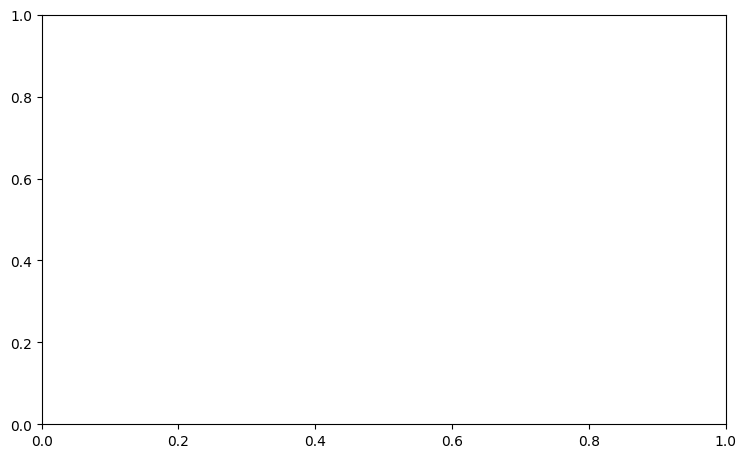

In [44]:
print(data_air_pol_scaled)
all_col = pd.DataFrame(data_air_pol_scaled).columns[:-4].tolist()
plt.figure(figsize = (30, 50))
print(all_col)
for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)

    # Create a temporary DataFrame for plotting
    temp_df = pd.DataFrame({
        'value': data_air_pol_scaled[:, i],  # Select the i-th column (feature)
        'group': data_air_pol_tsne['groups']
    })

    sns.boxplot(y='value', x='group', data=temp_df)

    plt.tight_layout()

    plt.title(variable)

plt.show()

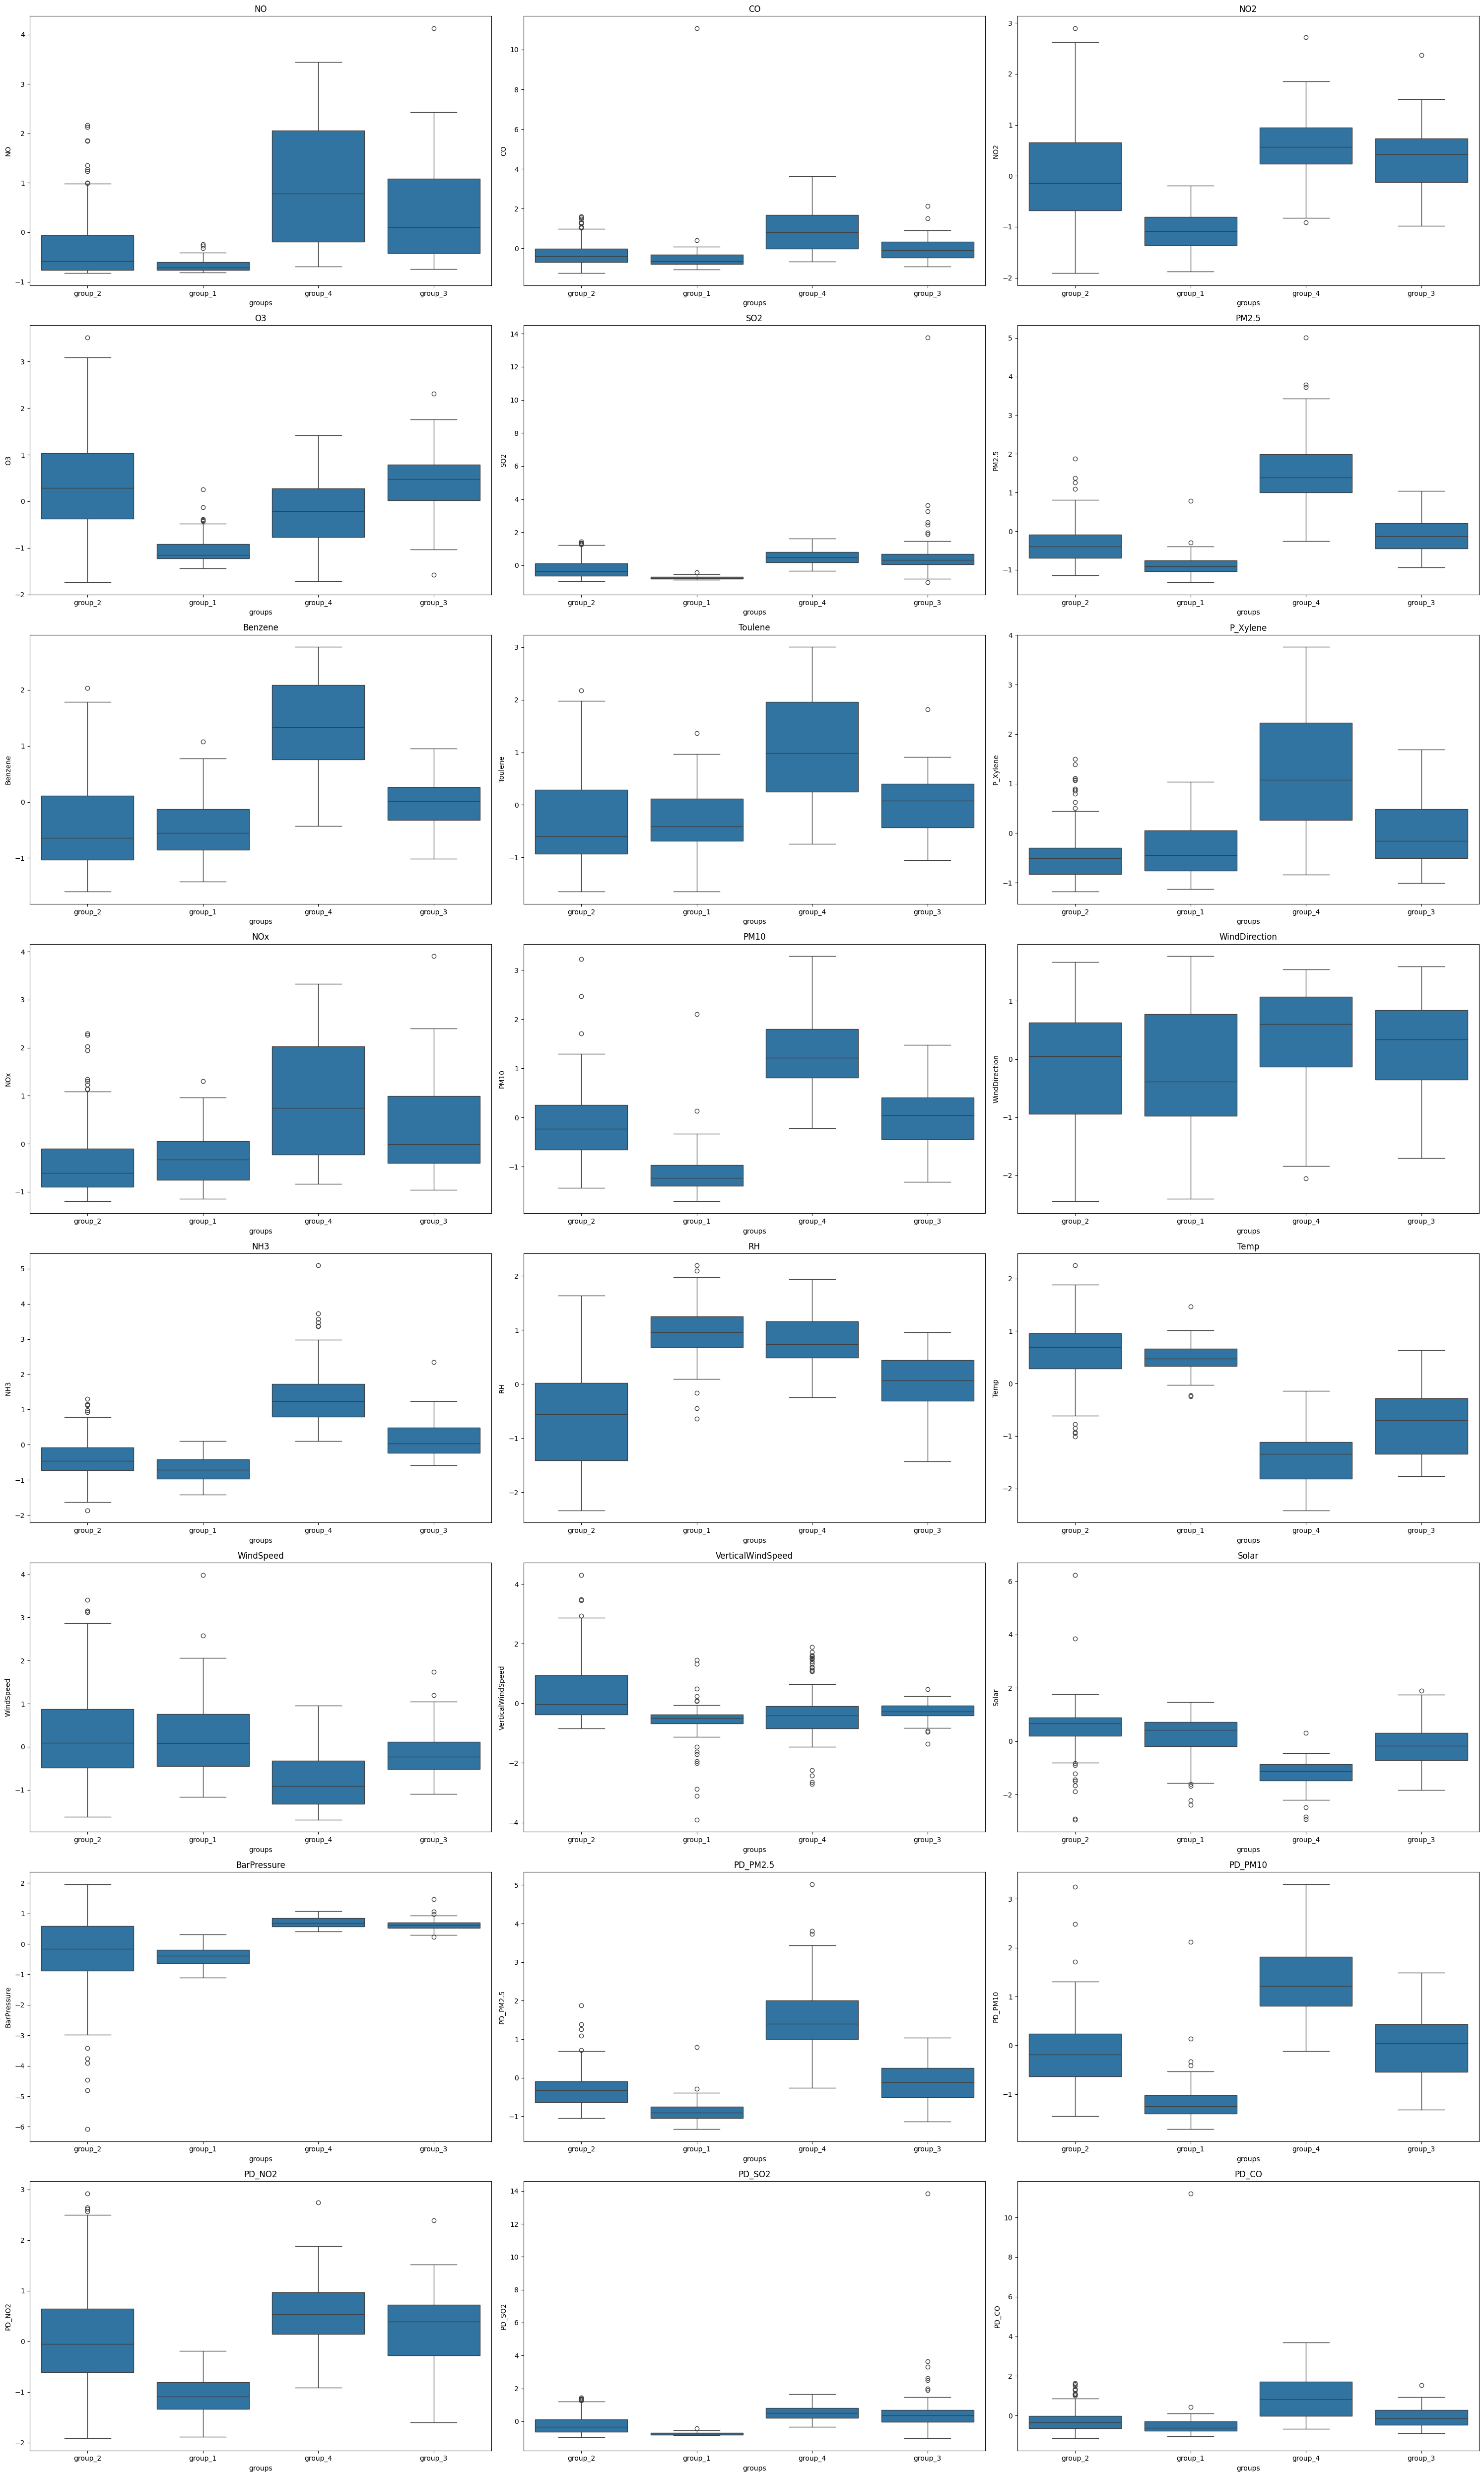

In [45]:
all_col = data_air_pol_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)

    sns.boxplot(y=data_air_pol_scaled[variable], x=data_air_pol_tsne['groups'])

    plt.tight_layout()

    plt.title(variable)

plt.show()